# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

# Optional: LazyPredict
!pip install lazypredict -q
from lazypredict.Supervised import LazyRegressor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.5/720.5 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# **1. Data Understanding**

# **1.1 Data Loading**

In [2]:
df = pd.read_csv("/content/mental_health_digital_behavior_data.csv")
df.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.80,53,5.90,89,133.20,6.80,8.90,10.00,44.80
1,351.70,52,7.20,79,109.50,5.50,9.40,10.00,43.60
2,398.90,39,8.00,108,84.70,6.70,9.40,9.40,52.60
3,451.40,44,6.50,78,88.90,6.00,9.40,5.10,58.40
4,346.00,43,6.90,35,78.80,8.20,9.40,8.00,59.70


# **1.2 Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


terdapat 8 data numerik yaitu:

* daily_screen_time_min : Total waktu layar harian
* num_app_switches : Jumlah kali pengguna beralih antar aplikasi dalam sehari Integer
* sleep_hours : Jumlah jam tidur per hari
* notification_count : Jumlah notifikasi yang diterima pengguna dalam sehari Integer
* social_media_time_min : Waktu yang dihabiskan di platform media sosial
* focus_score : Skor fokus yang dilaporkan sendiri
* mood_score : Skor suasana hati yang dilaporkan sendiri
* anxiety_level : Tingkat kecemasan yang dilaporkan sendiri  
* digital_wellbeing_score : Skor yang dihitung * * berdasarkan tingkat fokus, tidur, dan kecemasan; nilai yang lebih tinggi menunjukkan kesejahteraan yang lebih baik

In [4]:
df.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,360.44,49.84,6.56,79.51,121.77,7.00,8.99,8.45,52.31
std,58.78,7.34,1.19,23.98,43.81,0.62,0.52,2.13,7.94
min,180.00,30.00,3.00,20.00,30.00,5.50,7.40,1.00,34.60
25%,317.98,44.00,5.80,63.00,91.88,6.60,8.60,7.28,46.80
50%,360.80,50.00,6.50,80.00,119.55,7.00,9.00,9.70,51.00
75%,398.18,55.00,7.33,96.00,149.50,7.40,9.30,10.00,56.60
max,591.20,72.00,10.00,158.00,296.70,8.60,10.00,10.00,80.80


In [5]:
df.shape

(500, 9)

# **1.2.1 EDA - Menangani Missing Value dan Duplikat**

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
daily_screen_time_min,0
num_app_switches,0
sleep_hours,0
notification_count,0
social_media_time_min,0
focus_score,0
mood_score,0
anxiety_level,0
digital_wellbeing_score,0


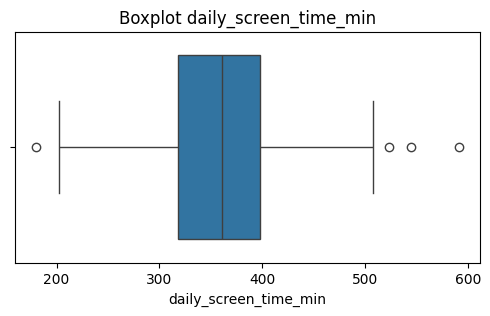

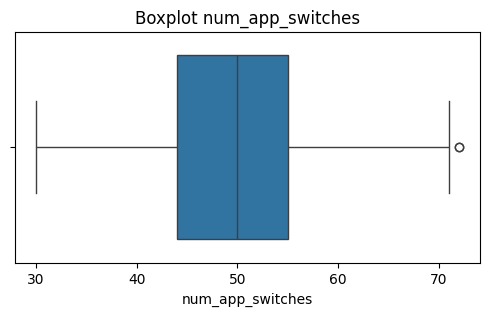

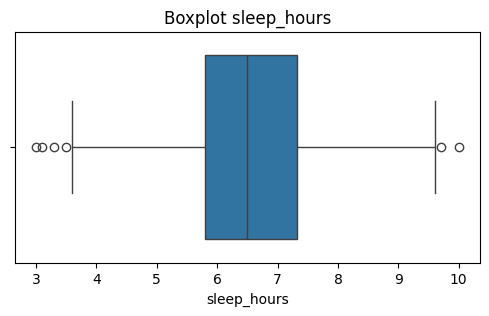

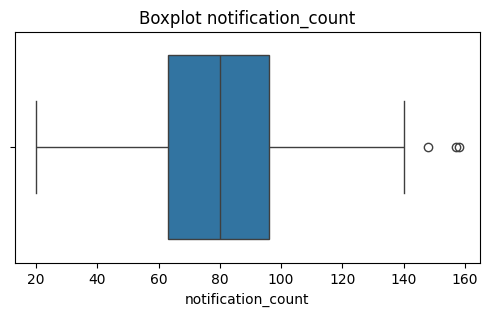

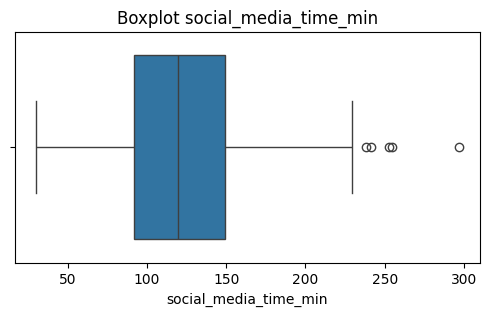

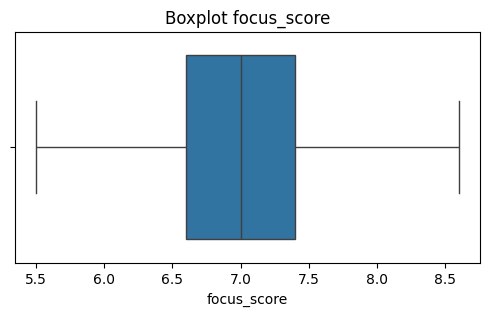

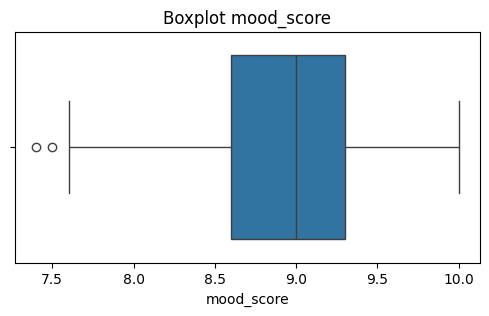

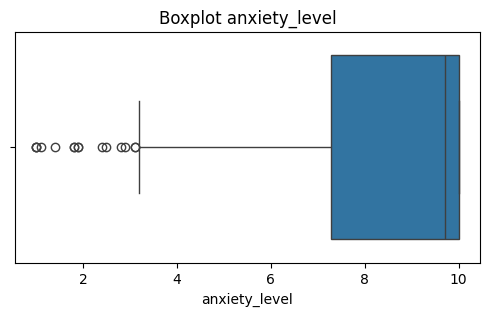

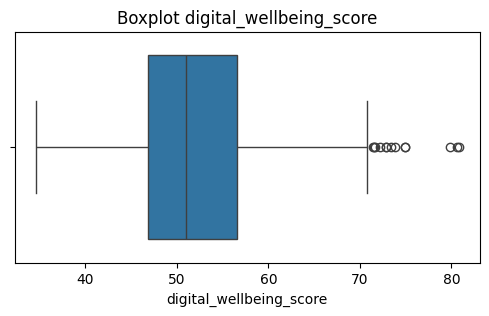

In [8]:
#  Visualisasi outlier (boxplot untuk tiap kolom numerik)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.

IQR = Inter Quartile Range

IQR = Q3 - Q1

In [10]:
# Menghapus outlier dengan metode IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# **1.2.2 EDA EDA - Visualisasi Data**

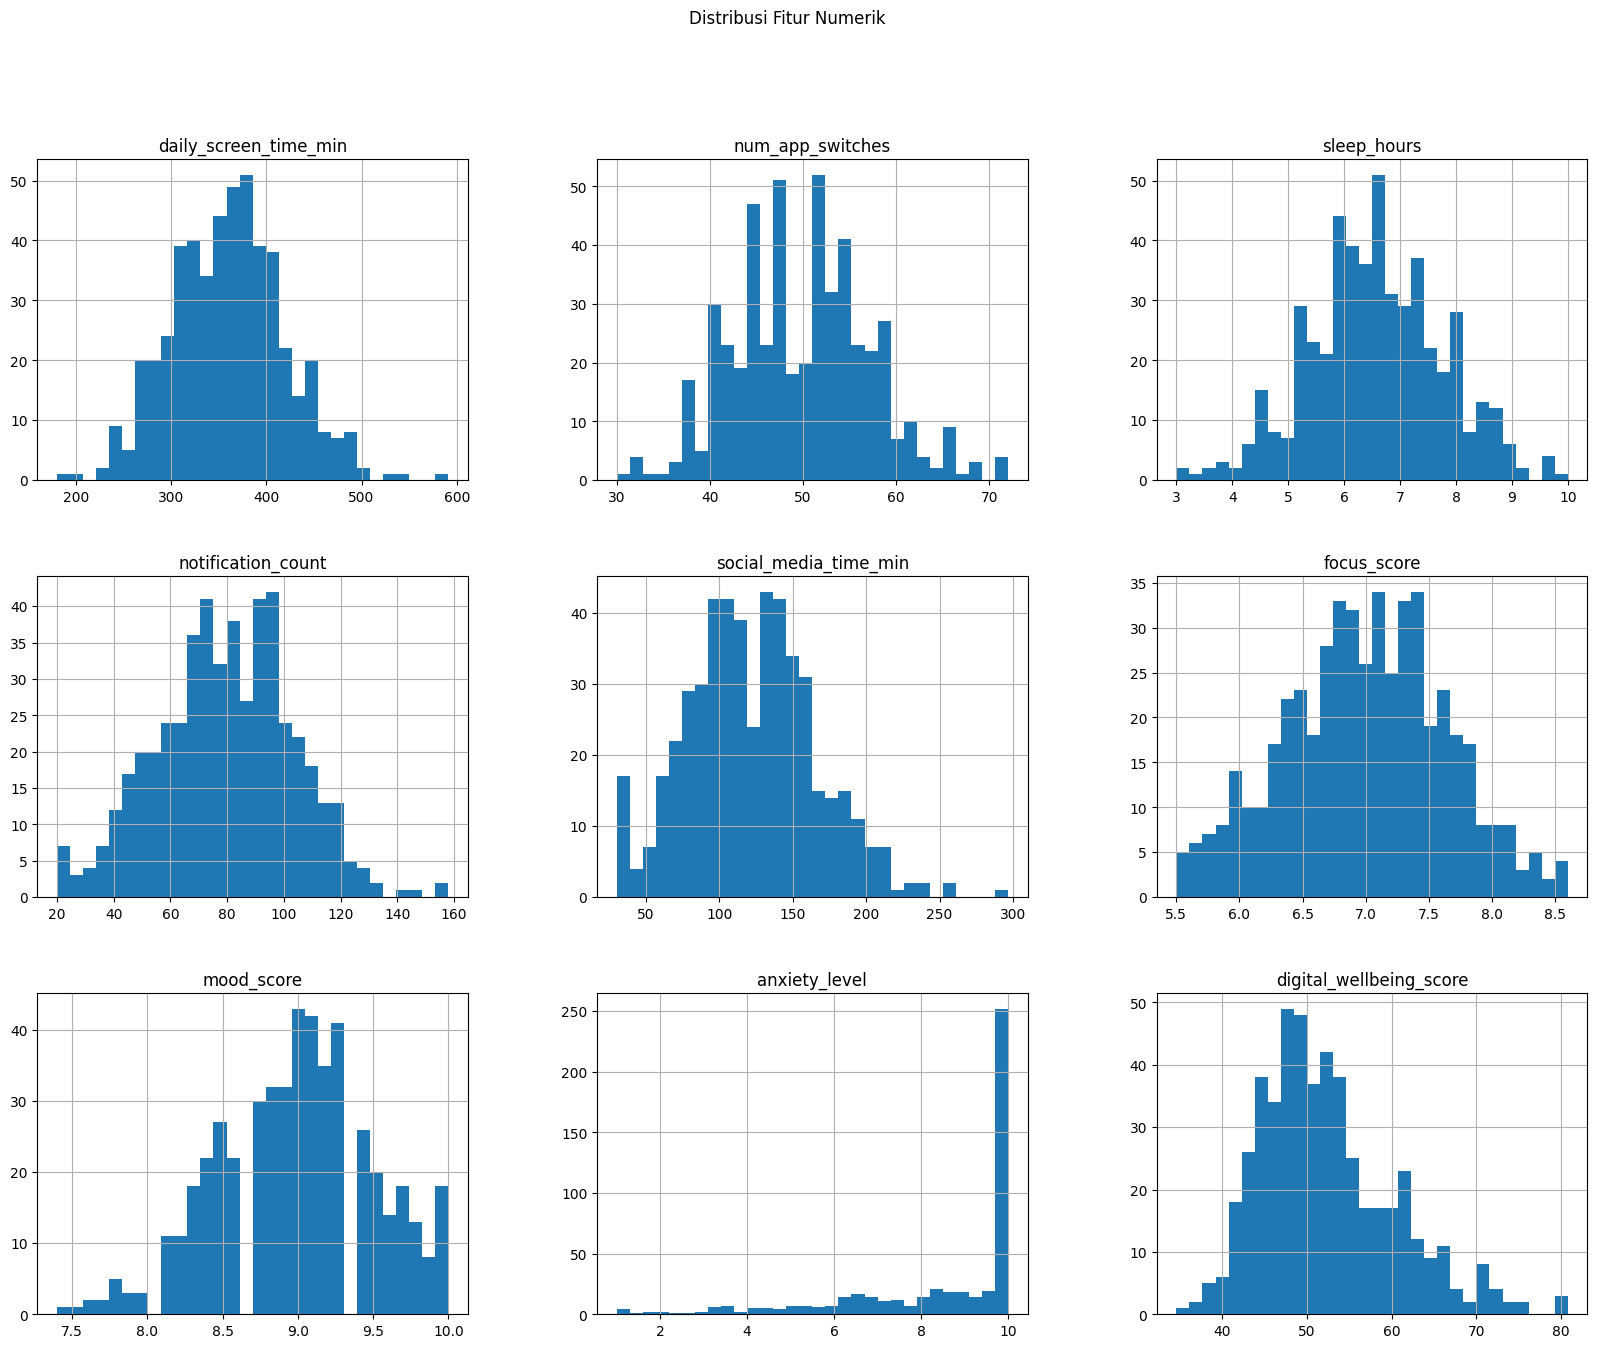

In [11]:
# Visualisasi distribusi tiap fitur (histogram)
df[num_cols].hist(bins=30, figsize=(20,15))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

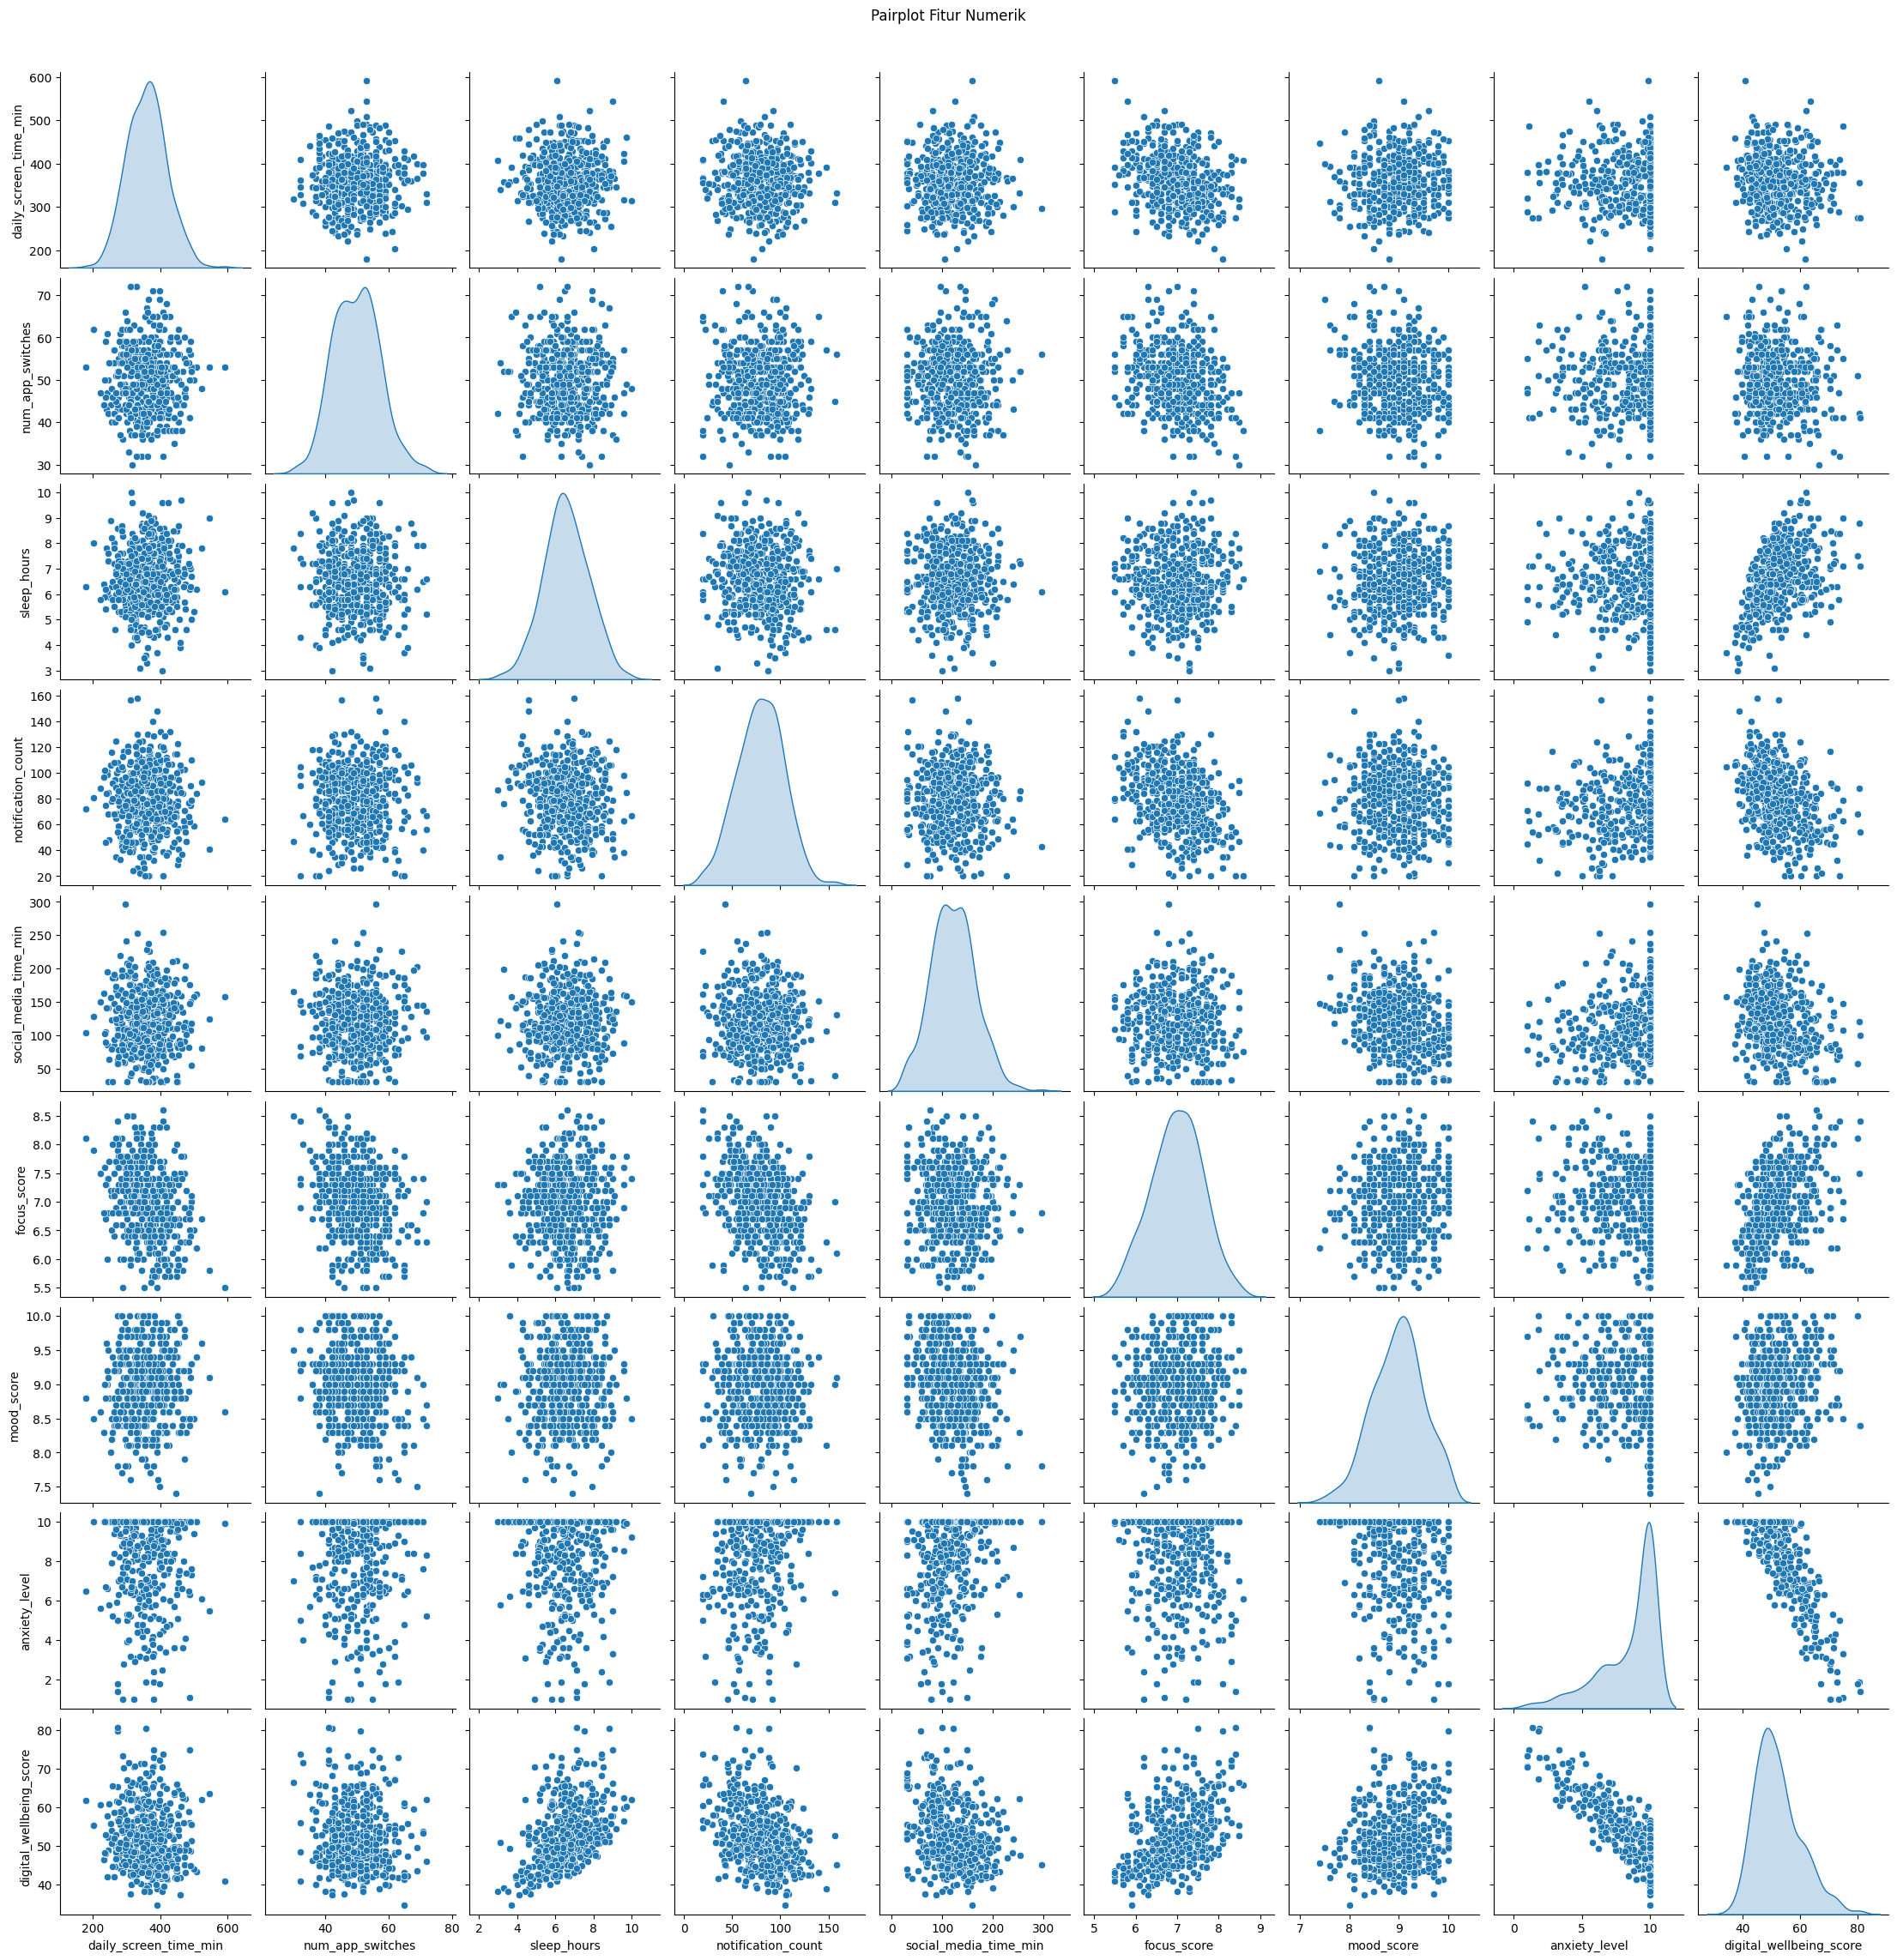

In [12]:
# Analisis multivariat
# Pairplot
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairplot Fitur Numerik", y=1.02)
plt.show()

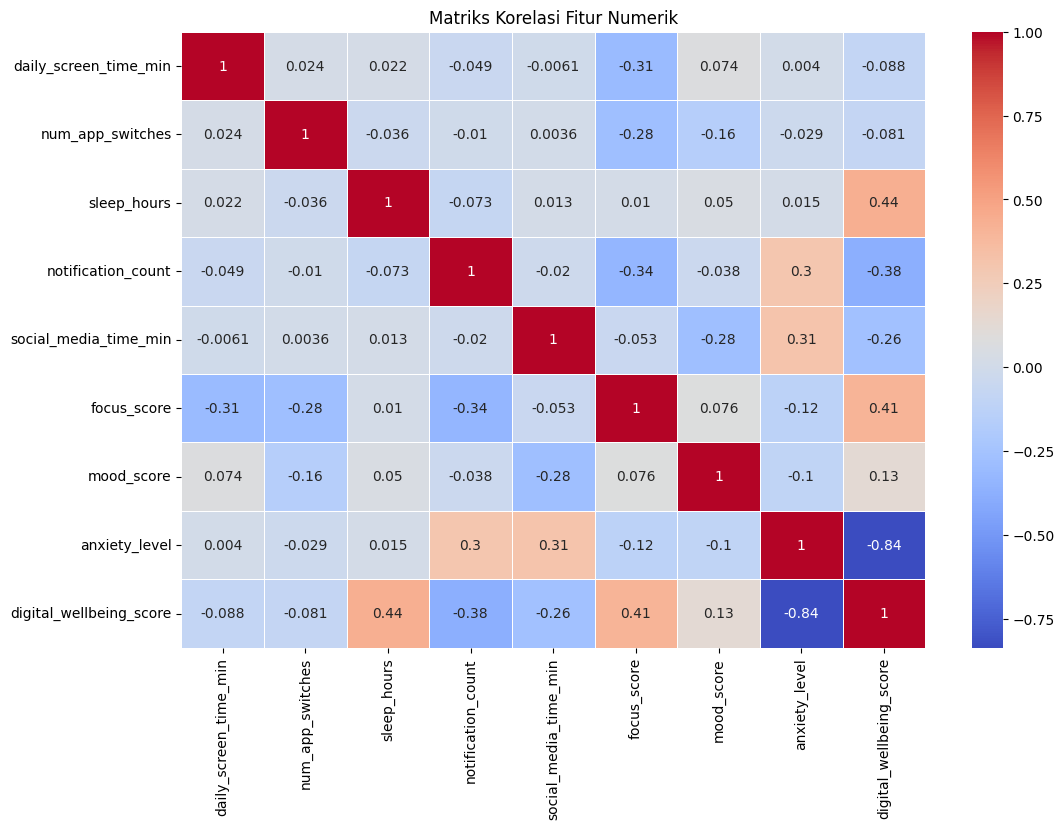

In [13]:
# Heatmap korelasi
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# **2. Data Preparation**

# **2.1 Pisahkan Fitur dan Target**

In [14]:
X = df.drop("digital_wellbeing_score", axis=1)
y = df["digital_wellbeing_score"]

# **2.2 Train-Test Split**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **2.3 Normalisasi**

In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **3. Model Development**

# **3.1 Model LazyRegressor**

In [36]:

print(models.columns)

# Assuming the column name is 'R-Squared' based on common LazyPredict output
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models = models.sort_values(by='R-Squared', ascending=False) # Corrected column name
print(models)

Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 8
[LightGBM] [Info] Start training from score 52.610500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

# **3.2 Visualisasi LazyRegressor**

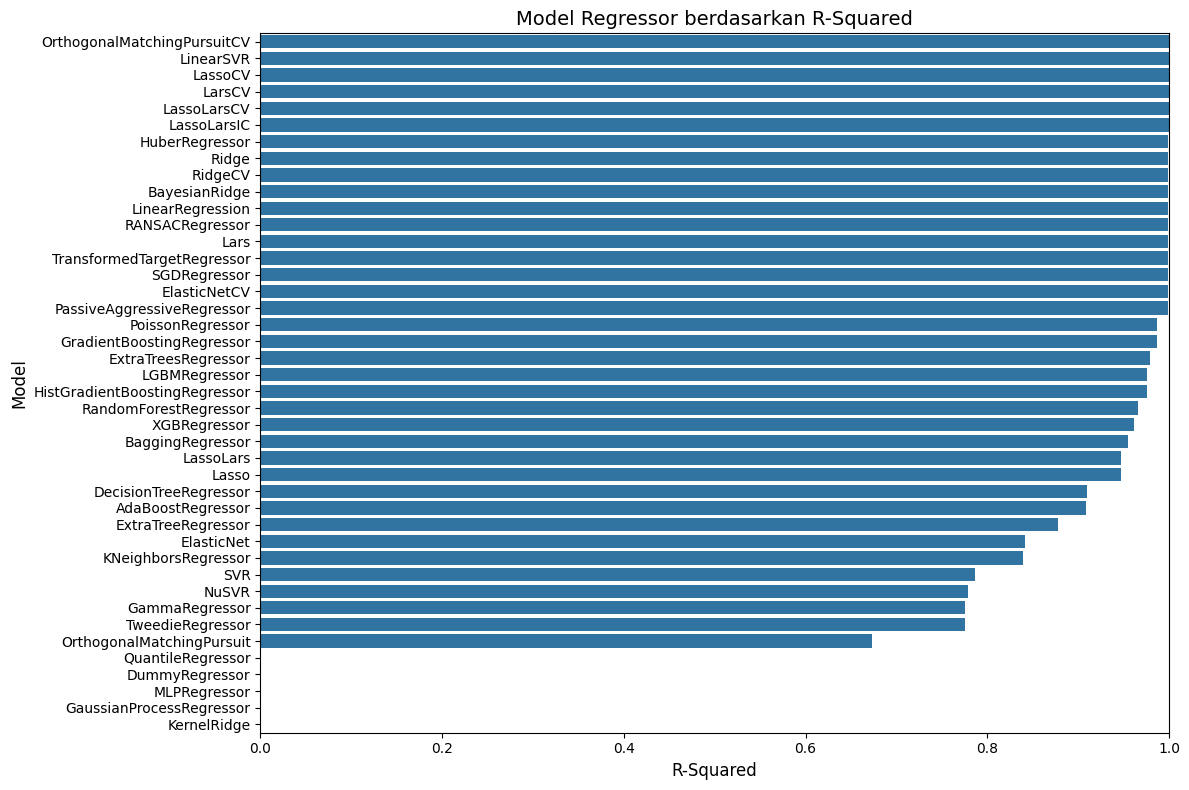

In [28]:
plt.figure(figsize=(12, 8))  # Perbesar ukuran figure

# Buat barplot dengan orientasi horizontal
sns.barplot(x=models['R-Squared'], y=models.index, orient='h')

plt.title("Model Regressor berdasarkan R-Squared", fontsize=14)
plt.xlabel("R-Squared", fontsize=12)
plt.ylabel("Model", fontsize=12)

# Atur batas x-axis agar lebih luas (misalnya dari 0 ke 1 jika nilainya di kisaran itu)
plt.xlim(0, 1)

plt.tight_layout()  # Agar label tidak terpotong
plt.show()

# **3.3 Model Manual**

In [39]:
# === KNN ===
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
knn_pred = model_knn.predict(x_test)

# Initialize model_results as an empty dictionary before adding results
model_results = {}
model_results['KNN'] = r2_score(y_test, knn_pred)

# === Random Forest ===
model_rf = RandomForestRegressor(max_depth=20, random_state=42)
model_rf.fit(x_train, y_train)
rf_pred = model_rf.predict(x_test)
model_results['Random Forest'] = r2_score(y_test, rf_pred)

# === SVR ===
model_svr = SVR()
model_svr.fit(x_train, y_train)
svr_pred = model_svr.predict(x_test)
model_results['SVR'] = r2_score(y_test, svr_pred)

# === Extra Trees ===
model_etc = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42)
model_etc.fit(x_train, y_train)
etc_pred = model_etc.predict(x_test)
model_results['Extra Trees'] = r2_score(y_test, etc_pred)

# === Konversi ke DataFrame dan urutkan ===
model_results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['R-Squared'])
model_results_df = model_results_df.sort_values(by='R-Squared', ascending=False)

# **3.4 Visualisasi Model Manual**

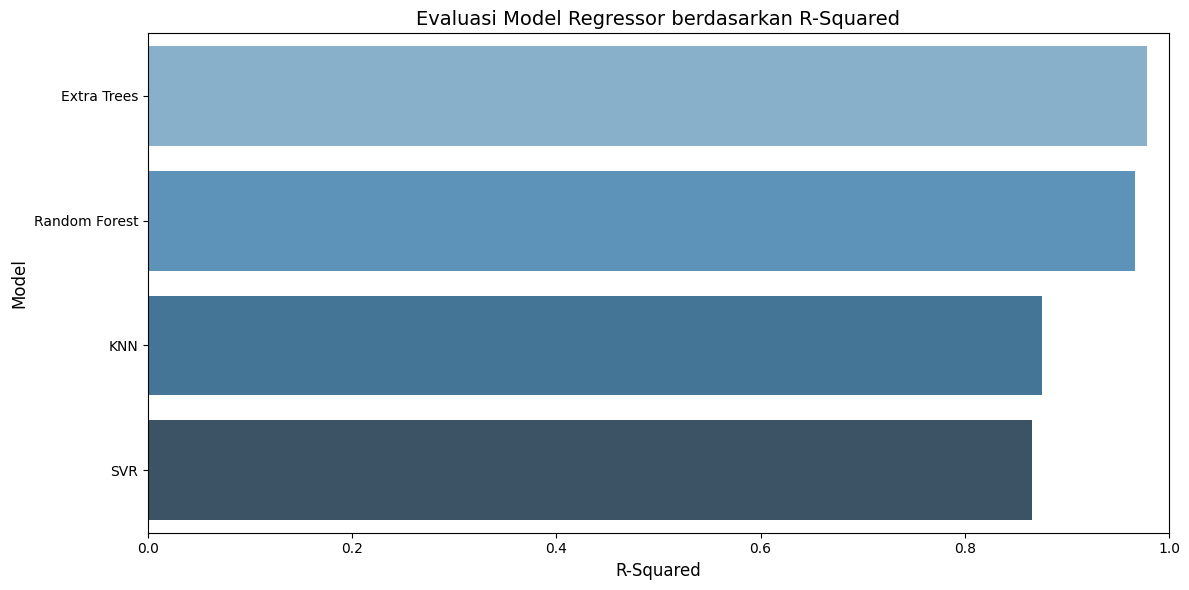

               R-Squared
Extra Trees         0.98
Random Forest       0.97
KNN                 0.88
SVR                 0.87


In [41]:
# === Visualisasi (sama seperti LazyRegressor) ===
plt.figure(figsize=(12, 6))
sns.barplot(x='R-Squared', y=model_results_df.index, data=model_results_df, orient='h', palette='Blues_d')
plt.title("Evaluasi Model Regressor berdasarkan R-Squared", fontsize=14)
plt.xlabel("R-Squared", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1)  # Sesuaikan rentang jika perlu
plt.tight_layout()
plt.show()

# (Opsional) Cetak tabel
print(model_results_df)

# **4. Evaluasi Model**

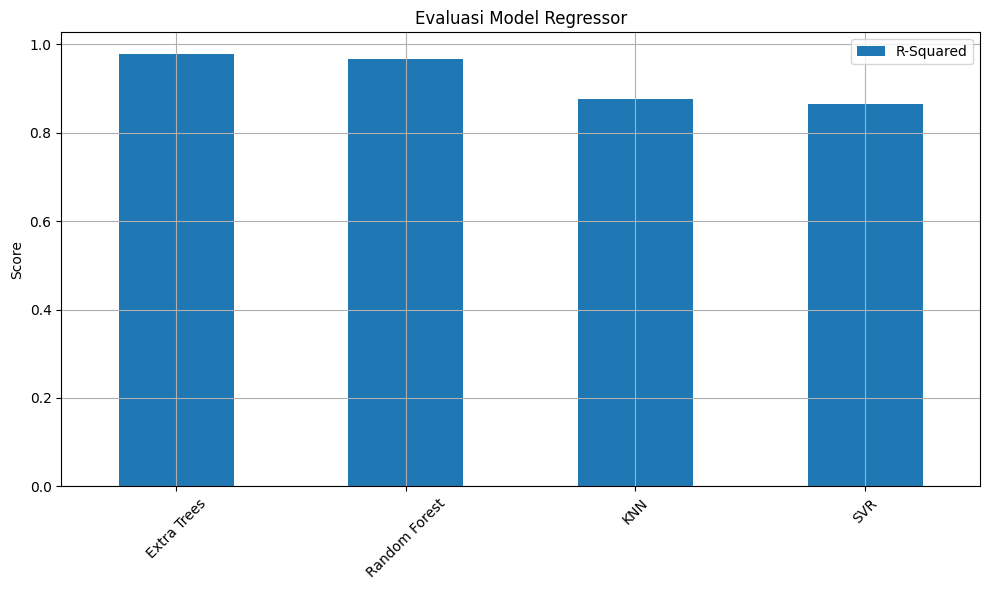

In [43]:
model_results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Evaluasi Model Regressor")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()